In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[:80%]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.678I23_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings 

In [ ]:
img_size = (128, 128)

def preprocess(image, label):
  image = tf.image.resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
for images, labels in ds_train.take(1):
  print(images.shape)
  print(labels.shape)

(32, 128, 128, 3)
(32,)


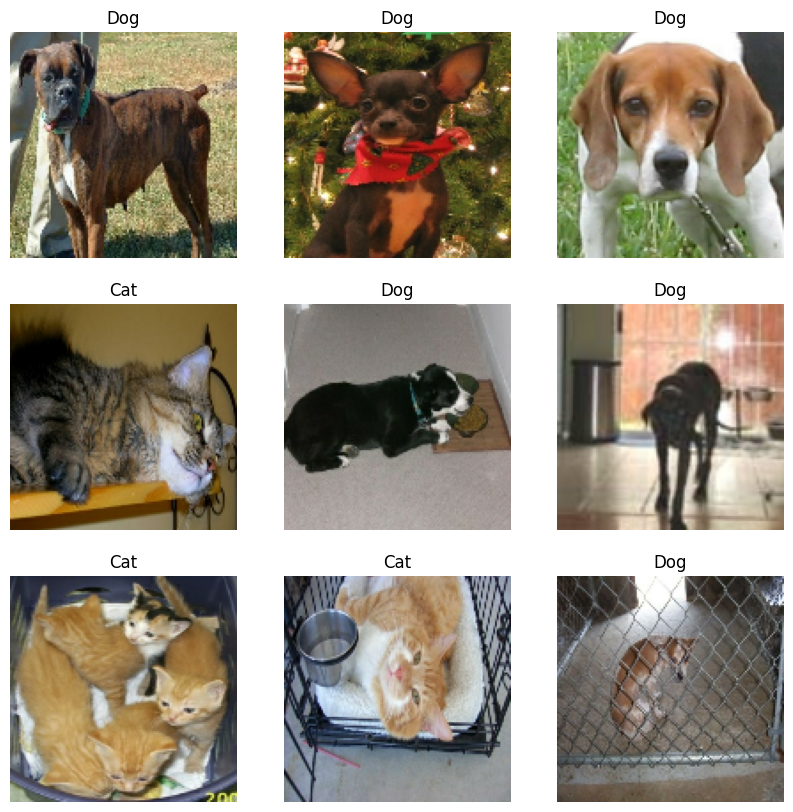

In [ ]:
# Take one batch from the training dataset
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):  # show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title("Cat" if labels[i].numpy() == 0 else "Dog")
        plt.axis("off")
    plt.show()


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')

])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(ds_train,epochs=30,validation_data=ds_test)

Epoch 1/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 72ms/step - accuracy: 0.5940 - loss: 0.6585 - val_accuracy: 0.7116 - val_loss: 0.5594
Epoch 2/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.7654 - loss: 0.4892 - val_accuracy: 0.7677 - val_loss: 0.4767
Epoch 3/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.8158 - loss: 0.4023 - val_accuracy: 0.8112 - val_loss: 0.4075
Epoch 4/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.8683 - loss: 0.3081 - val_accuracy: 0.8704 - val_loss: 0.2970
Epoch 5/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9095 - loss: 0.2222 - val_accuracy: 0.9011 - val_loss: 0.2434
Epoch 6/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9446 - loss: 0.1441 - val_accuracy: 0.9049 - val_loss: 0.2456
Epoch 7/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9640 - loss: 0.0978 - val_accuracy: 0.8684 - val_loss: 0.4203
Epoch 8/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9759 - loss: 0.0716 - 

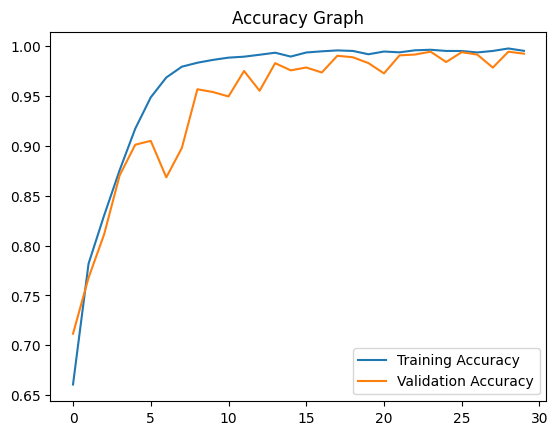

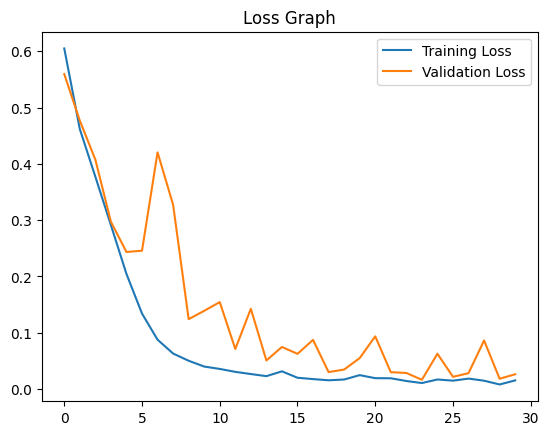

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


In [ ]:
model.save("cats1_dogs_model.h5")
